In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
x,y = make_classification(n_samples=100,n_features=2,n_informative=2, n_redundant=0,n_repeated=0,n_classes=2,random_state=42)
df = pd.DataFrame(x,columns=['x','y'])
df["labels"] = y

In [ ]:
df.head()

,x,y,labels
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1


In [ ]:
df.tail()

,x,y,labels
95,1.804741,-0.149941,1
96,1.154661,-0.955482,1
97,-0.567725,1.389918,0
98,-1.158068,0.865620,0
99,-1.755186,0.360170,0


In [ ]:
df.shape

(100, 3)

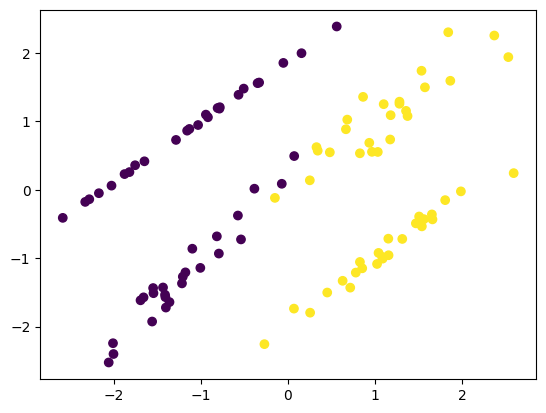

In [ ]:
plt.scatter(df['x'],df['y'],c = df['labels'])

In [ ]:
x = df.iloc[:,0:2].values
y = df.iloc[:,1].values

In [ ]:
model = Sequential()
#model.add(Dense(2,activation='relu',input_dim=2))
#model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# checking from which number weights are initialized
model.get_weights()

[array([[-0.5046311 , -0.05572587, -0.0100441 ,  0.5272257 ,  0.5321564 ,
          0.6897668 ,  0.5938857 ,  0.55436486, -0.6824271 , -0.0184834 ],
        [-0.30452228,  0.5756666 , -0.32925168, -0.1792    ,  0.652888  ,
         -0.5920103 ,  0.3208366 , -0.5894967 , -0.5817701 , -0.4215762 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.16357195],
        [ 0.46727604],
        [ 0.15256536],
        [-0.46069506],
        [-0.5511197 ],
        [ 0.47448152],
        [-0.6978172 ],
        [-0.00794417],
        [ 0.44352287],
        [-0.26339862]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
# now setting weights to 0
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [ ]:
# compiling
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.0000e+00 - loss: 18.2788 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 17.9249 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 18.3223 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 17.5772 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 18.0956 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 17.4660 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 16.1786 - val_accuracy: 0.0000e+00 - val_loss: 12.9888
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/st

In [ ]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]